In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from diffract import single_DMD_scenario_parallel as DMD_par
from diffract import single_DMD_scenario as DMD

### Define Current DMD Scenario

In [24]:
num_procs = 6                           # Number of processors to use
spls = (20, 20)                         # Number of samples in x and y per DMD mirror
width = (10.8e-6, 10.8e-6)              # Width in meters of each DMD mirror
fill = 0.90                             # Fill factor
tiles = (70, 3)                         # Number of mirrros to tile in x and y
wave = 0.905e-6                         # Wavelength of light in meters
theta_x = np.arange(-1.2, 0.2, 0.0002)  # Output angles to look over in x, radians
theta_y = [0.]                          # Output angles to calculate over in y, radians

### Run parallel scenario

In [41]:
# Define 
num_lds = 5  # Number of laser diodes
del_inc_x_angs = (23.1 - 37.3) / (num_lds + 1)  # Degrees
inc_x_angs = list(np.arange(0, num_lds) - np.mean(np.arange(0, num_lds)))  # Index
inc_x_angs = list(map(lambda x: 30 + x * del_inc_x_angs, inc_x_angs))  # Degrees

In [43]:
out = np.zeros((1, theta_x.size)) * 1j
for ii, inc_x_ang in enumerate(inc_x_angs):
    print('Processing angle {:d} of {:d}...'.format(ii + 1, len(inc_x_angs)))
    inc = (np.radians(inc_x_ang), 0)  # Incident angle of light in x and y, radians 
    out_single_angle = np.zeros((1, theta_x.size)) * 1j
    for dmd_x_angle in [-12, -4.9, 0, 5.8, 10.3]:
        DMD_ang = (np.radians(dmd_x_angle), 0)  # Define tilt angle of DMD, radians
        u_2 = DMD_par(num_procs, spls, width, fill, tiles, wave, theta_x, theta_y, inc, DMD_ang)
        out_single_angle += u_2
    # Save output data in csv file
    np.savetxt('Output_data_{:2.2f}deg.csv'.format(inc_x_ang), np.abs(out_single_angle), delimiter=',')
    out += out_single_angle
# Save all data in csv file
np.savetxt('Output_data_combined.csv', np.concatenate((np.degrees(theta_x[np.newaxis, :].real), np.abs(out)), axis=0).T, delimiter=',')
print('Done.')

Processing angle 1 of 5...
Processing angle 2 of 5...
Processing angle 3 of 5...
Processing angle 4 of 5...
Processing angle 5 of 5...
Done.


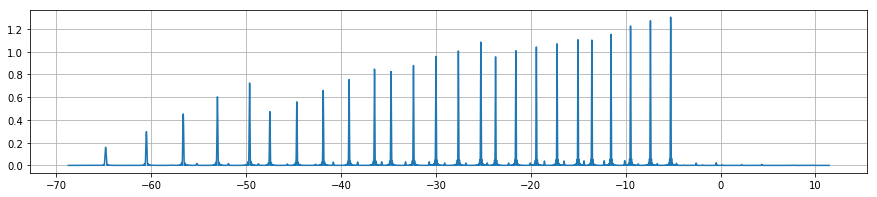

In [44]:
plt.figure(figsize=(15, 3))
plt.plot(np.degrees(theta_x), np.abs(out).squeeze())
plt.grid()
plt.show()